In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, setdiff
import numpy.polynomial.polynomial as poly
from astropy.stats import mad_std
import statsmodels.api as sm
from opensave import *
from matplotlib.ticker import NullFormatter
from matplotlib.gridspec import GridSpec
from astropy.stats import sigma_clip
from matplotlib.colorbar import Colorbar as cb
from scipy.optimize import curve_fit

In [11]:

filename = './v4/combinedgrui.dat'
df = opendf(filename)


# df = df[df['d2d']<.25]
ldf = df
print(ldf.columns,len(df))

Index(['COADD_OBJECT_ID', 'RA', 'DEC', 'ALPHAWIN_J2000', 'DELTAWIN_J2000',
       'ECM', 'SOF_PSF_MAG_G_CORRECTED', 'SOF_PSF_MAG_R_CORRECTED',
       'SOF_PSF_MAG_ERR_G', 'SOF_PSF_MAG_ERR_R', 'starid', 'rx', 'ry', 'rmag',
       'rmerr', 'rsky', 'riter', 'rchi', 'rsharp', 'ra_r', 'dec_r', 'gx', 'gy',
       'gmag', 'gmerr', 'gsky', 'giter', 'gchi', 'gsharp', 'ra_g', 'dec_g',
       'd2d'],
      dtype='object') 87


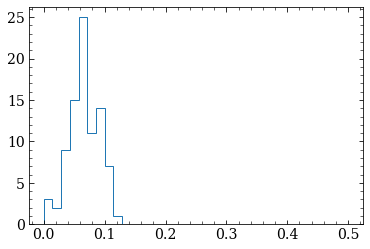

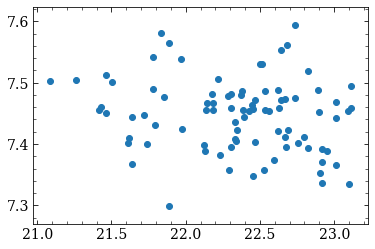

0.11513776268442293


In [4]:
plt.hist(ldf['d2d'],histtype='step', bins='auto', range=(0,.5))
gdiff = df.SOF_PSF_MAG_G_CORRECTED-df.gmag
#color = df.des_g-df.des_r
color = df.gmag-df.rmag
scolor = sm.add_constant(color)
rdiff = df.SOF_PSF_MAG_R_CORRECTED-df.rmag

gsig = df.SOF_PSF_MAG_G_CORRECTED - df.gmag
rsig = df.SOF_PSF_MAG_R_CORRECTED - df.rmag

plt.figure()
plt.scatter(df.SOF_PSF_MAG_G_CORRECTED, gsig)
# plt.plot(np.linspace(17,24), np.full_like(np.linspace(17,24), 0.), 'k')
plt.show()
print(max(df.d2d))

## first fit

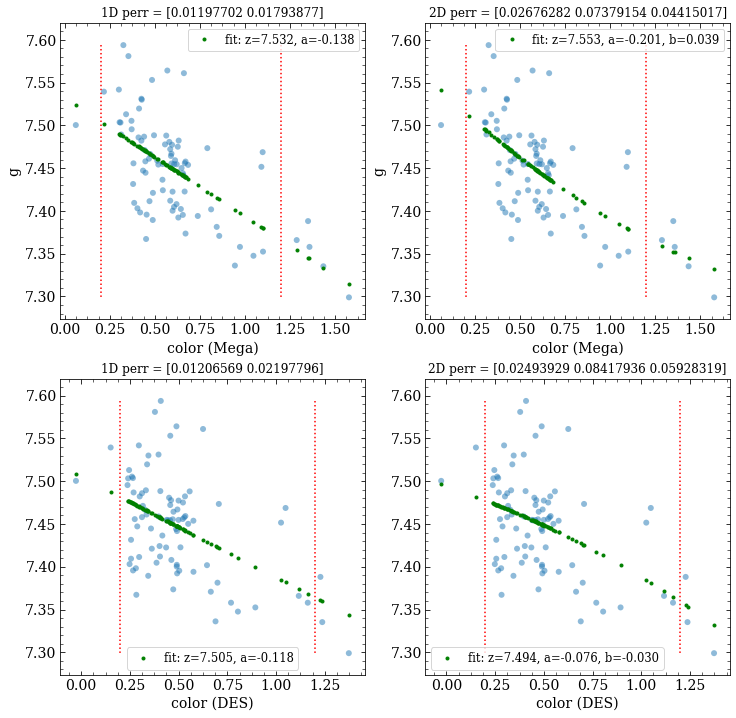

In [5]:

def mag_func(color, z, alpha):
    return z + (alpha * color)

def mag_func2(color, z, alpha, beta):
    return z + (alpha * color) + (beta * color**2)

color_m = df.gmag - df.rmag
color_d = df.SOF_PSF_MAG_G_CORRECTED - df.SOF_PSF_MAG_R_CORRECTED
delta_g = df.SOF_PSF_MAG_G_CORRECTED - df.gmag
delta_r = df.SOF_PSF_MAG_R_CORRECTED - df.rmag

gpopt, gpcov = curve_fit(mag_func, color_m, delta_g)
g2popt, g2pcov = curve_fit(mag_func2, color_m, delta_g)

ydiff = np.linspace(max(delta_g),min(delta_g))
color1 = np.full_like(ydiff, .2)
color2 = np.full_like(ydiff, 1.2)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter(color_m, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func(color_m, *gpopt), 'g.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(gpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.xlabel('color (Mega)')
plt.ylabel('g')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(gpcov))))

plt.subplot(222)
plt.scatter(color_m, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func2(color_m, *g2popt), 'g.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(g2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.ylabel('g')
plt.xlabel('color (Mega)')
plt.title('2D perr = '+str(np.sqrt(np.diag(g2pcov))))

gpopt, gpcov = curve_fit(mag_func, color_d, delta_g)
g2popt, g2pcov = curve_fit(mag_func2, color_d, delta_g)

plt.subplot(223)
plt.scatter(color_d, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func(color_d, *gpopt), 'g.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(gpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.xlabel('color (DES)')
plt.title('1D perr = '+str(np.sqrt(np.diag(gpcov))))

plt.subplot(224)
plt.scatter(color_d, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func2(color_d, *g2popt), 'g.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(g2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.xlabel('color (DES)')
plt.title('2D perr = '+str(np.sqrt(np.diag(g2pcov))))

# plt.savefig('./gbandfits_smallcolor.png', dpi=150)
plt.show()

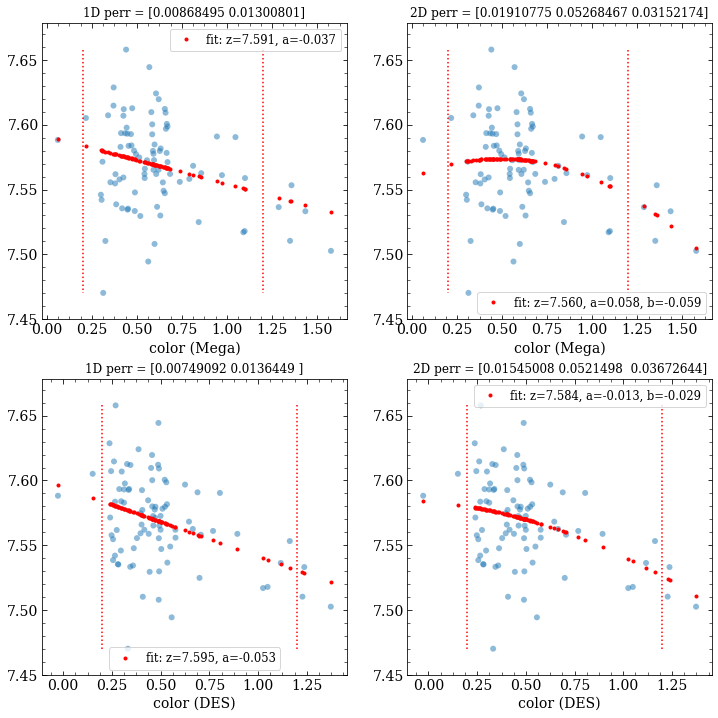

In [6]:
rpopt, rpcov = curve_fit(mag_func, color_m, delta_r)
r2popt, r2pcov = curve_fit(mag_func2, color_m, delta_r)
ydiff = np.linspace(max(delta_r),min(delta_r))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.scatter(color_m, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func(color_m, *rpopt), 'r.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(rpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(rpcov))))
plt.xlabel('color (Mega)')

plt.subplot(222)
plt.scatter(color_m, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func2(color_m, *r2popt), 'r.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(r2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('2D perr = '+str(np.sqrt(np.diag(r2pcov))))
plt.xlabel('color (Mega)')

rpopt, rpcov = curve_fit(mag_func, color_d, delta_r)
r2popt, r2pcov = curve_fit(mag_func2, color_d, delta_r)


plt.subplot(223)
plt.scatter(color_d, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func(color_d, *rpopt), 'r.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(rpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(rpcov))))
plt.xlabel('color (DES)')

plt.subplot(224)
plt.scatter(color_d, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func2(color_d, *r2popt), 'r.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(r2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('2D perr = '+str(np.sqrt(np.diag(r2pcov))))
plt.xlabel('color (DES)')

# plt.savefig('./rbandfits_smallcolor.png', dpi=150)
plt.show()

## second (refined fit)

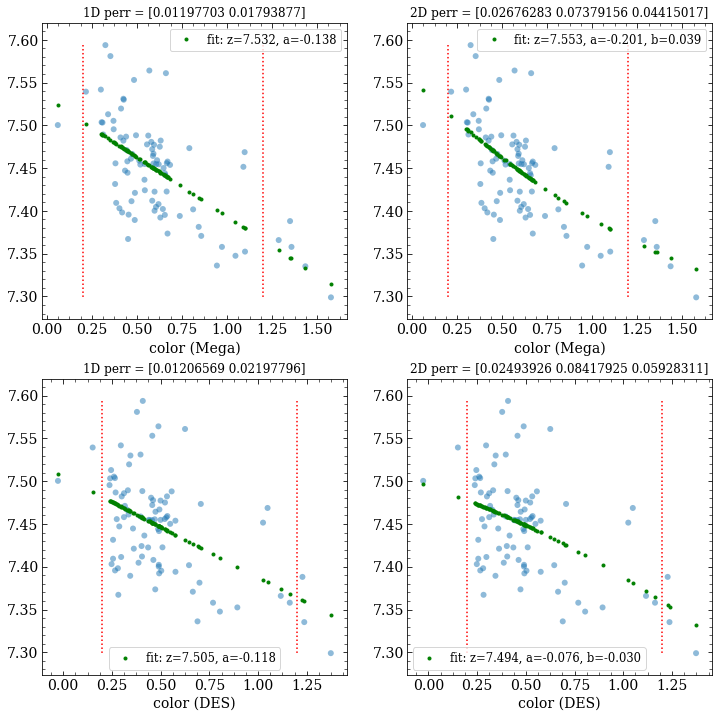

In [7]:
def mag_func(color, z, alpha):
    return z + (alpha * color)

def mag_func2(color, z, alpha, beta):
    return z + (alpha * color) + (beta * color**2)


color_m = df.gmag - df.rmag
color_d = df.SOF_PSF_MAG_G_CORRECTED - df.SOF_PSF_MAG_R_CORRECTED
delta_g = df.SOF_PSF_MAG_G_CORRECTED - df.gmag
delta_r = df.SOF_PSF_MAG_R_CORRECTED - df.rmag

gpopt, gpcov = curve_fit(mag_func, color_m, delta_g, bounds=([7.1,-.5],[7.6,.5]))
g2popt, g2pcov = curve_fit(mag_func2, color_m, delta_g, bounds=([7.1,-.5,-.1],[7.6,.5,.1]))

ydiff = np.linspace(max(delta_g),min(delta_g))
color1 = np.full_like(ydiff, .2)
color2 = np.full_like(ydiff, 1.2)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter(color_m, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func(color_m, *gpopt), 'g.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(gpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.xlabel('color (Mega)')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(gpcov))))

plt.subplot(222)
plt.scatter(color_m, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func2(color_m, *g2popt), 'g.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(g2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.xlabel('color (Mega)')
plt.title('2D perr = '+str(np.sqrt(np.diag(g2pcov))))

gpopt, gpcov = curve_fit(mag_func, color_d, delta_g, bounds=([7.1,-.5],[7.6,.5]))
g2popt, g2pcov = curve_fit(mag_func2, color_d, delta_g, bounds=([7.1,-.5,-.1],[7.6,.5,.1]))

plt.subplot(223)
plt.scatter(color_d, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func(color_d, *gpopt), 'g.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(gpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.xlabel('color (DES)')
plt.title('1D perr = '+str(np.sqrt(np.diag(gpcov))))

plt.subplot(224)
plt.scatter(color_d, delta_g, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func2(color_d, *g2popt), 'g.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(g2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.xlabel('color (DES)')
plt.title('2D perr = '+str(np.sqrt(np.diag(g2pcov))))

# plt.savefig('./gbandfits_refined.png', dpi=150)
plt.show()

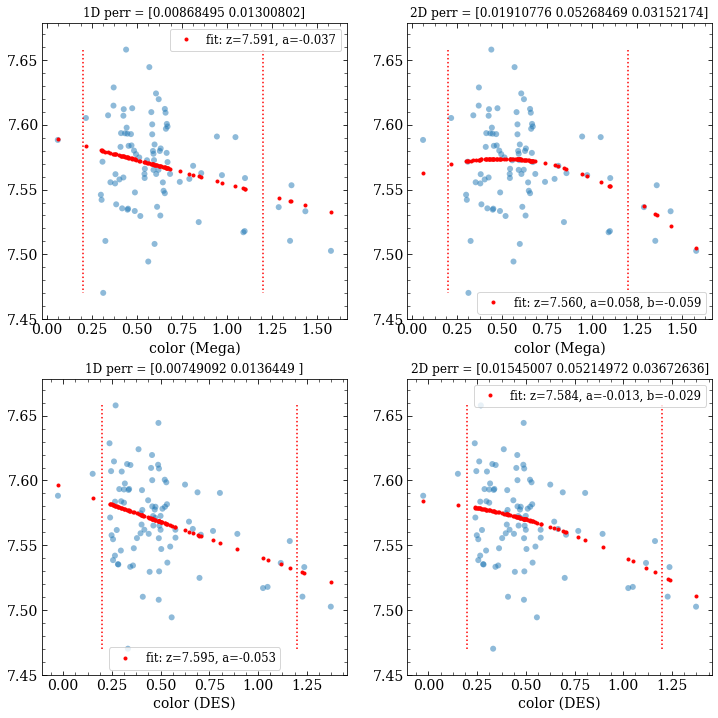

In [8]:
rpopt, rpcov = curve_fit(mag_func, color_m, delta_r, bounds=([7.55,-.1],[7.725,.1]))
r2popt, r2pcov = curve_fit(mag_func2, color_m, delta_r, bounds=([7.55,-.1,-.1],[7.725,.1,.1]))
ydiff = np.linspace(max(delta_r),min(delta_r))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.scatter(color_m, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func(color_m, *rpopt), 'r.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(rpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(rpcov))))
plt.xlabel('color (Mega)')

plt.subplot(222)
plt.scatter(color_m, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_m, mag_func2(color_m, *r2popt), 'r.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(r2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('2D perr = '+str(np.sqrt(np.diag(r2pcov))))
plt.xlabel('color (Mega)')

rpopt, rpcov = curve_fit(mag_func, color_d, delta_r, bounds=([7.,-.5],[8.,.5]))
r2popt, r2pcov = curve_fit(mag_func2, color_d, delta_r, bounds=([7.,-.5,-.5],[8.,.5,.5]))


plt.subplot(223)
plt.scatter(color_d, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func(color_d, *rpopt), 'r.',
         label='fit: z=%5.3f, a=%5.3f' % tuple(rpopt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('1D perr = '+str(np.sqrt(np.diag(rpcov))))
plt.xlabel('color (DES)')

plt.subplot(224)
plt.scatter(color_d, delta_r, edgecolors='none', alpha=.5)
plt.plot(color_d, mag_func2(color_d, *r2popt), 'r.',
         label='fit: z=%5.3f, a=%5.3f, b=%5.3f' % tuple(r2popt))
plt.plot(color1, ydiff, 'r:')
plt.plot(color2, ydiff, 'r:')
plt.legend()
plt.title('2D perr = '+str(np.sqrt(np.diag(r2pcov))))
plt.xlabel('color (DES)')

# plt.savefig('./rbandfits_refined.png', dpi=150)
plt.show()

In [9]:
df = ldf
# df = df[(df.gmag-df.rmag<1.2) & (df.gmag-df.rmag>=.2)]

rpopt, rpcov = curve_fit(mag_func, color_m, delta_r, bounds=([7.55,-.1],[7.725,.1]))
gpopt, gpcov = curve_fit(mag_func, color_m, delta_g, bounds=([7.1,-.5],[7.6,.5]))
Mr = df.rmag + rpopt[0] + (rpopt[1]*color_m)
Mg = df.gmag + gpopt[0] + (gpopt[1]*color_m)

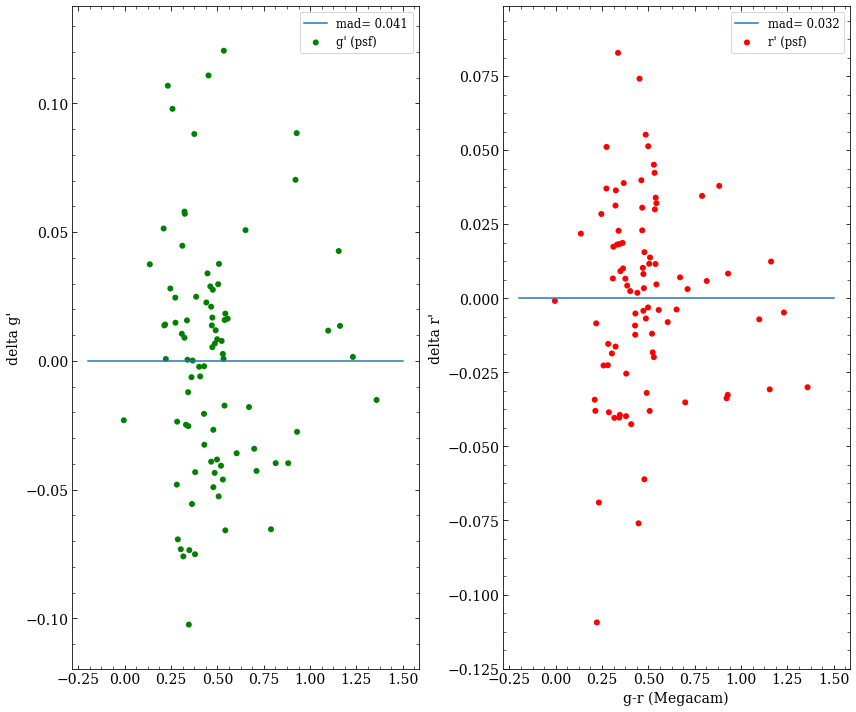

In [10]:
x2 = np.linspace(-.2,1.5,2)
y = np.zeros_like(x2)
plt.figure(figsize=(12,10))     # 
plt.subplot(121)

plt.scatter(Mg-Mr,df.SOF_PSF_MAG_G_CORRECTED-Mg, edgecolor='none', label='g\' (psf)', color='green')
plt.plot(x2,y, label='mad= {0:.3f}'.format((mad_std(df.SOF_PSF_MAG_G_CORRECTED-Mg))))
#plt.xlim(-.5,1)

plt.ylabel('delta g\'')
plt.legend(loc='best',fancybox=True)
#plt.ylim(-.3,.3)
plt.subplot(122)
plt.scatter(Mg-Mr,df.SOF_PSF_MAG_R_CORRECTED-Mr, edgecolor='none', label='r\' (psf)', color='red')
#plt.xlim(-.5,1)
plt.plot(x2,y,label='mad= {0:.3f}'.format((mad_std(df.SOF_PSF_MAG_R_CORRECTED-Mr))))
plt.ylabel('delta r\'')
plt.xlabel('g-r (Megacam)')
plt.legend(loc='best',fancybox=True)
#plt.ylim(-.3,.3)

plt.tight_layout()

plt.savefig('./look.png', dpi=350)
#plt.savefig('./wcolorcorrection1020718.png', dpi=350)
plt.show()

mad = 0.031
mad = 0.021
17.176750182105874 22.71548906840628


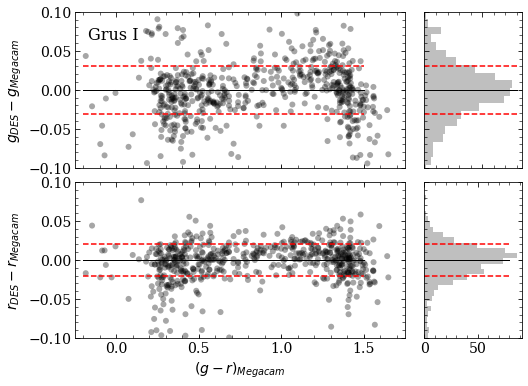

In [25]:
tudf= df
#plt.rc('font', size=50)
gs = GridSpec(4,4)
xlim = -.25,1.75
ylim = -.1,.1
nullfmt = NullFormatter()
fig = plt.figure(figsize=(8,6))
gscat = fig.add_subplot(gs[0:2,0:3])
rscat = fig.add_subplot(gs[2:4,0:3])
ghist = fig.add_subplot(gs[0:2,3])
rhist = fig.add_subplot(gs[2:4,3])

rhist.yaxis.set_major_formatter(nullfmt)
ghist.yaxis.set_major_formatter(nullfmt)
ghist.xaxis.set_major_formatter(nullfmt)
gscat.xaxis.set_major_formatter(nullfmt)
gscat.scatter(Mg-Mr,tudf.SOF_PSF_MAG_G_CORRECTED-Mg, edgecolor='none', label='g', color='k', alpha=.35)
rscat.scatter(Mg-Mr,tudf.SOF_PSF_MAG_R_CORRECTED-Mr, edgecolor='none', label='r', color='k',alpha=.35)
ghist.hist(tudf.SOF_PSF_MAG_G_CORRECTED-Mg, orientation='horizontal',bins='auto',alpha=.25,color='k')
rhist.hist(tudf.SOF_PSF_MAG_R_CORRECTED-Mr, orientation='horizontal',bins='auto',alpha=.25,color='k')
ghist.plot(np.linspace(0,80,2),np.zeros(2),color='k',lw=1)
rhist.plot(np.linspace(0,80,2),np.zeros(2),color='k',lw=1)


gscat.plot(x2,y, label='zero',color='k',lw=1)
rscat.plot(x2,y,label='zero',color='k',lw=1)
gscat.plot(x2,y+mad_std(tudf.SOF_PSF_MAG_G_CORRECTED-Mg),'r--')#,alpha=.75)
rscat.plot(x2,y+mad_std(tudf.SOF_PSF_MAG_R_CORRECTED-Mr),'r--')#,alpha=.75)
gscat.plot(x2,y-mad_std(tudf.SOF_PSF_MAG_G_CORRECTED-Mg),'r--')#,alpha=.75)
rscat.plot(x2,y-mad_std(tudf.SOF_PSF_MAG_R_CORRECTED-Mr),'r--')#,alpha=.75)

# ghist.plot(np.linspace(0,100,2),np.zeros(2)+.01,'k--',alpha=.5)
# rhist.plot(np.linspace(0,100,2),np.zeros(2)+.01,'k--',alpha=.5)
# ghist.plot(np.linspace(0,100,2),np.zeros(2)-.01,'k--',alpha=.5)
# rhist.plot(np.linspace(0,100,2),np.zeros(2)-.01,'k--',alpha=.5)
ghist.plot(np.linspace(0,80,2),np.zeros(2)+mad_std(tudf.SOF_PSF_MAG_G_CORRECTED-Mg),'r--')#,alpha=.5)
rhist.plot(np.linspace(0,80,2),np.zeros(2)+mad_std(tudf.SOF_PSF_MAG_R_CORRECTED-Mr),'r--')#,alpha=.5)
ghist.plot(np.linspace(0,80,2),np.zeros(2)-mad_std(tudf.SOF_PSF_MAG_G_CORRECTED-Mg),'r--')#,alpha=.5)
rhist.plot(np.linspace(0,80,2),np.zeros(2)-mad_std(tudf.SOF_PSF_MAG_R_CORRECTED-Mr),'r--')#,alpha=.5)
print('mad = {0:.3f}'.format(mad_std(tudf.SOF_PSF_MAG_G_CORRECTED-Mg)))
print('mad = {0:.3f}'.format(mad_std(tudf.SOF_PSF_MAG_R_CORRECTED-Mr)))
gscat.set_ylabel(r'$g_{DES}-g_{Megacam}$')
rscat.set_ylabel(r'$r_{DES}-r_{Megacam}$')
rscat.set_xlabel(r'$(g - r)_{Megacam}$')

gscat.set_xlim(xlim)
rscat.set_xlim(xlim)

gscat.set_ylim(ylim)
rscat.set_ylim(ylim)
ghist.set_ylim(ylim)
rhist.set_ylim(ylim)
# gscat.legend(loc='best',fancybox=True)
# rscat.legend(loc='best',fancybox=True)
gscat.text(-.17,0.065,'Grus I', fontsize=16)
#plt.tight_layout()

#plt.savefig('./histcorrection040518.png',dpi=350)
# plt.savefig('./GrusDistribution.pdf',dpi=150)
#plt.savefig('./distribution0619.eps')
print(min(tudf.SOF_PSF_MAG_G_CORRECTED), max(tudf.SOF_PSF_MAG_G_CORRECTED))

In [582]:
grufile = './grui.dat'
grutbl = Table.read(grufile, format='ascii')
grutbl.colnames
Mr = df.rmag + rpopt[0] + (rpopt[1]*color_m)
Mg = df.gmag + gpopt[0] + (gpopt[1]*color_m)
grutbl['MAG_G_TRANSFORMED'] = grutbl['gmag'] + gpopt[0] + (gpopt[1] * (grutbl['gmag']-grutbl['rmag']))
grutbl['MAG_R_TRANSFORMED'] = grutbl['rmag'] + rpopt[0] + (rpopt[1] * (grutbl['gmag']-grutbl['rmag']))
grutbl['COLOR'] = grutbl['MAG_G_TRANSFORMED'] - grutbl['MAG_R_TRANSFORMED']

grutbl.write('./Grui_transformed.fits', overwrite=True)

In [583]:
print(rpopt, gpopt)

[ 7.69464587 -0.04478297] [ 7.5801753 -0.1719552]


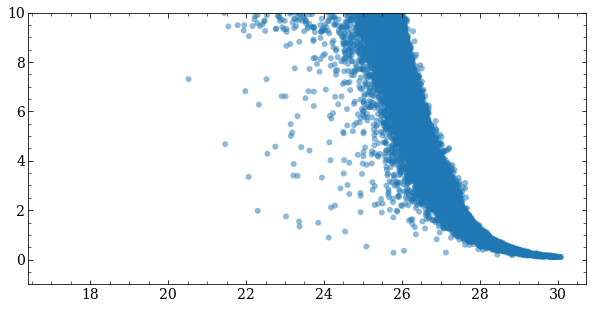

In [644]:
plt.figure(figsize=(10,5))
plt.scatter(grutbl['MAG_G_TRANSFORMED'], 1/grutbl['gmerr'], edgecolors='none', alpha=.5)
# plt.xlim(17.5, 27)
plt.ylim(-1,10)
plt.show()
# s/n ~ 5 == mag ~ 27
# s/n ~ 10 == mag \ga 26

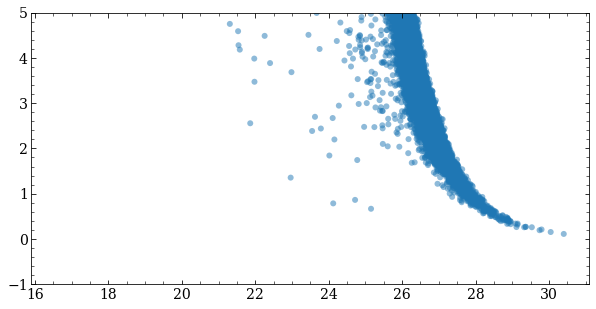

In [646]:
plt.figure(figsize=(10,5))
plt.scatter(grutbl['MAG_R_TRANSFORMED'], 1/grutbl['rmerr'], edgecolors='none', alpha=.5)
# plt.xlim(17.5, 27)
plt.ylim(-1,5)
plt.show()
# s/n ~ 5 == mag ~ 26.5
# s/n ~ 10 == mag ~ 25.5

In [648]:
print(min(grutbl['MAG_G_TRANSFORMED']), min(grutbl['MAG_R_TRANSFORMED']))
print(min(df['SOF_PSF_MAG_G_CORRECTED']), min(df['SOF_PSF_MAG_R_CORRECTED']))

17.069621407370025 16.5975517145511
17.176750182105874 16.811988356685546


In [665]:
dfile = './gruisofy3g2_all.fits'
d2file = '../gruisofgold_moremags.fits'
checkmags = Table.read(dfile)
checkmags2 = Table.read(d2file)
print(len(checkmags2['SOF_PSF_MAG_G_CORRECTED'])-len(checkmags['SOF_PSF_MAG_G_CORRECTED']))
print(min(checkmags['SOF_PSF_MAG_G_CORRECTED'])-min(checkmags2['SOF_PSF_MAG_G_CORRECTED']), min(checkmags['SOF_PSF_MAG_R_CORRECTED'])-min(checkmags2['SOF_PSF_MAG_R_CORRECTED']))

84
0.926966343712964 0.9215678681325628


In [669]:
sdiff = setdiff(checkmags2,checkmags, keys=['COADD_OBJECT_ID'])
print(max(sdiff['SOF_PSF_MAG_ERR_R']))

0.0015454890695028528


In [672]:
max(grutbl['MAG_R_TRANSFORMED'])

30.403233917443416